In [332]:
#Lucas Dia
#HW3
#Fraud detection algorithm

In [5]:
clear()

In [6]:
#importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import f1_score

In [7]:
#reading the data sets
data_train = pd.read_csv("HW3_training.csv")
print('Dataset size: ', len(data_train))
data_test_final = pd.read_csv("HW3_test_input.csv")
print('Test Data size: ', len(data_test_final))

Dataset size:  628971
Test Data size:  209944


In [4]:
# formatting data to explore the data
#changing it to be only where Fraud is present
modata=data_train
modata = modata[modata['isFraud']==1]
print(len(modata))

NameError: name 'data_train' is not defined

In [337]:
# Separate the training data into the input features (i.e., X) and the class labels (i.e., Y)
Y = data_train['isFraud']
X = data_train[ ['amount', 'oldbalanceOrg'] ]

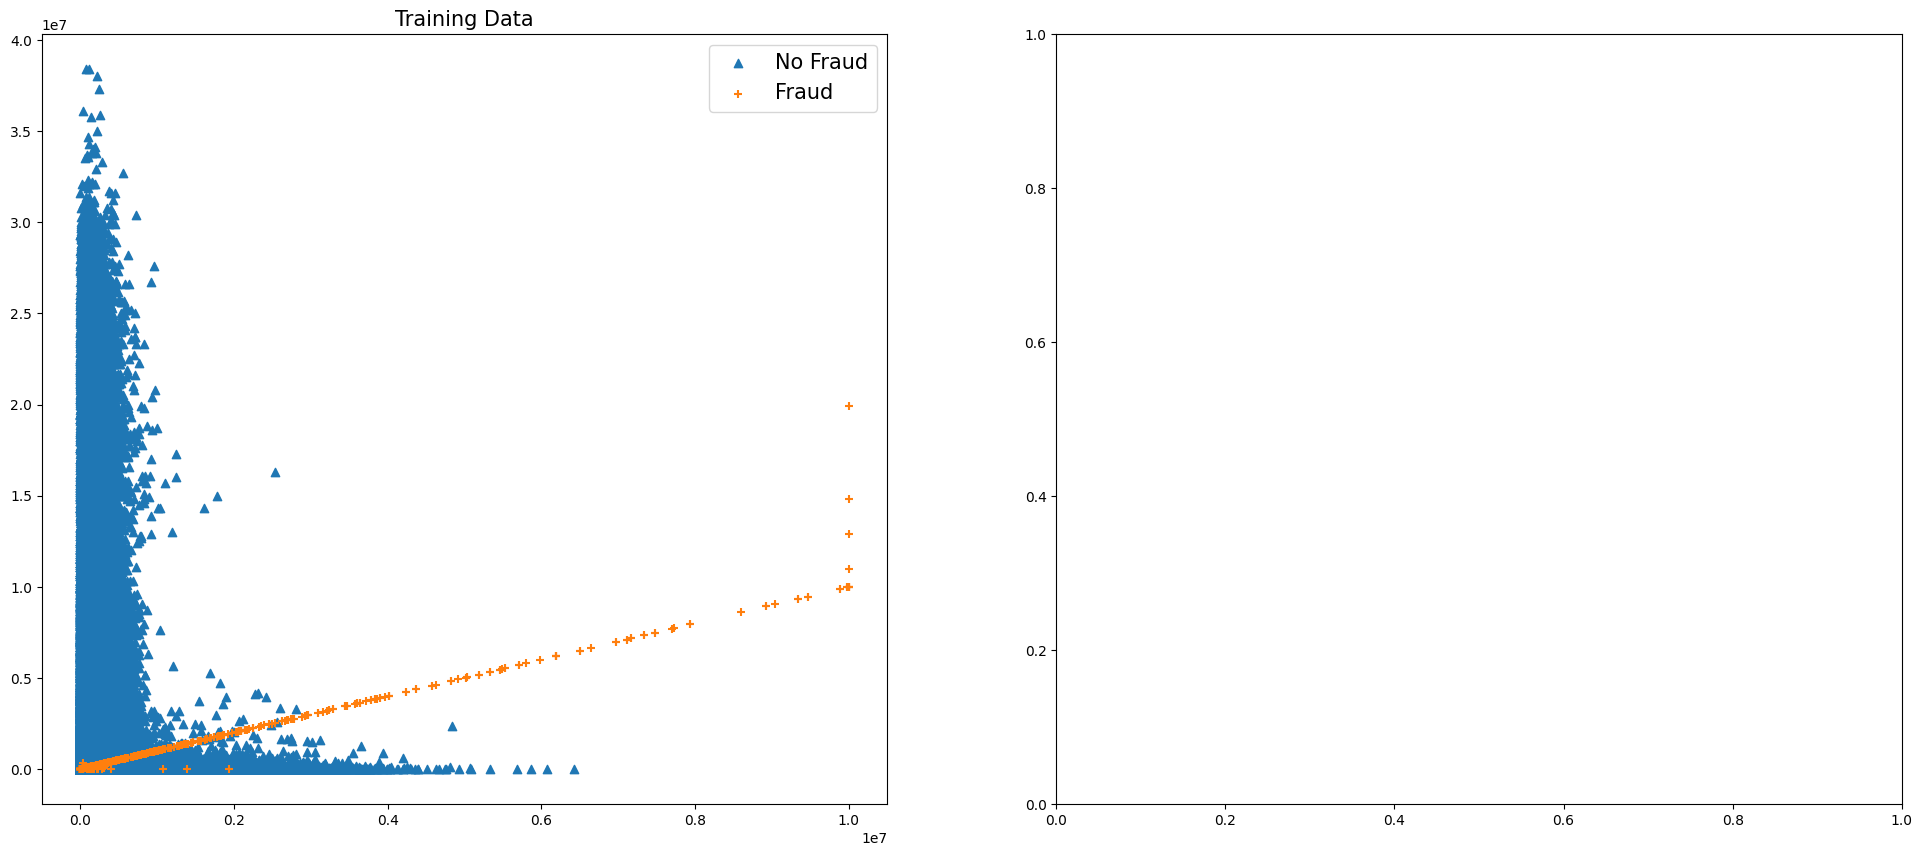

In [338]:
#plotting the training data to see if there are any patterns between amount and oldbalance
figure, axis = plt.subplots(1, 2, figsize=(24, 10), constrained_layout=False)
X1 = X[Y==0]
X2 = X[Y==1]
axis[0].scatter(X1['amount'], X1['oldbalanceOrg'], marker='^', label='No Fraud')
axis[0].scatter(X2['amount'], X2['oldbalanceOrg'], marker='+', label='Fraud')
axis[0].set_title( 'Training Data', fontsize = 15 )
axis[0].legend(fontsize = 15)

In [339]:
#based on the graph above we can see that there is a relationship between amount and oldbalance when fraud is true

In [340]:
#this is gonna calculate how often amount == oldbalanceOrg
p=0
for f in range(len(modata)):
    if modata.iloc[f]['amount'] == modata.iloc[f]['oldbalanceOrg']:
        p=p+1
#then prints out how often amount == oldbalance when fraud is True
print(p/len(modata))

0.9758771929824561


In [341]:
#what we learned from the above is that 97.58% of the truely fraudulent transactions will have amount == oldbalanceOrg. 

In [342]:
#check to see how often amount == oldbalanceOrg when isFraud == 0
#iterates over all the data, so takes a bit to run
p=0
modata2 = data_train[data_train['isFraud']==0]
for f in range(len(modata2)):
    if modata2.iloc[f]['amount'] == modata2.iloc[f]['oldbalanceOrg']:
        p=p+1
#print how often this is True
print(p/len(modata2))

0.0


In [343]:
#what we learned from the above is that 0% of the transactions which truely aren't fraud have amount == oldbalanceOrg.

In [344]:
#so if we always predict fraud when amount == oldbalanceOrg we would be correct 100% of the time but we
# would miss 2.4% of frauds (on the training data)

In [345]:
#now setting up the data to test different tree models
xx = data_train[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
yy = data_train[['isFraud']]
#getting dummies because categorical variable
xx = pd.get_dummies(xx, drop_first=True)
train_x, test_x, train_y, test_y = train_test_split( xx, yy, test_size=0.4, random_state = 1)
#look at the first few lines
xx.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,94865.94,41338.00,0.00,0.0,94865.94,1,0,0,0
1,318248.86,2980.00,321228.86,336116.4,17867.54,0,0,0,0
2,17546.87,0.00,0.00,0.0,0.00,0,0,1,0
3,126683.04,11162.85,0.00,2519453.7,2646136.74,1,0,0,0
4,150054.00,356.00,0.00,0.0,150054.00,1,0,0,0


In [346]:
#updating variable names
X_train = train_x
Y_train = train_y
X_test = test_x
Y_test = test_y

In [347]:
#testing which model to use

In [348]:
#first the linear regression
reg = LinearRegression().fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
for i in range(len(Y_pred)):
    if Y_pred[i]>.5:
        Y_pred[i]=1
    else:
        Y_pred[i]=0
print(classification_report(Y_test, Y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.999     1.000     0.999    251227
           1      1.000     0.064     0.119       362

    accuracy                          0.999    251589
   macro avg      0.999     0.532     0.559    251589
weighted avg      0.999     0.999     0.998    251589



In [349]:
#second logistic regression
reg = LogisticRegression().fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
for i in range(len(Y_pred)):
    if Y_pred[i]>.5:
        Y_pred[i]=1
    else:
        Y_pred[i]=0
print(classification_report(Y_test, Y_pred, digits = 3))

c:\users\diade\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0      1.000     1.000     1.000    251227
           1      0.723     0.820     0.768       362

    accuracy                          0.999    251589
   macro avg      0.861     0.910     0.884    251589
weighted avg      0.999     0.999     0.999    251589



In [350]:
#third would be K-NN but I don't really think that model applies well to this problem

In [351]:
#fourth would be the decision tree
aTreeClassifier = tree.DecisionTreeClassifier()
aTreeClassifier = aTreeClassifier.fit(X_train, Y_train)
Y_pred = aTreeClassifier.predict( X_test )
print(classification_report(Y_test, Y_pred, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000    251227
           1      0.734     0.785     0.758       362

    accuracy                          0.999    251589
   macro avg      0.867     0.892     0.879    251589
weighted avg      0.999     0.999     0.999    251589



In [352]:
#I have chosen to persue the decision tree here because even though the logistic model beat out the decision tree
#slightly in the f-1 scores with no tuning, I think that I will be able to tune the decision tree to a higher efficiency than
#I will be able to tune the logistic model

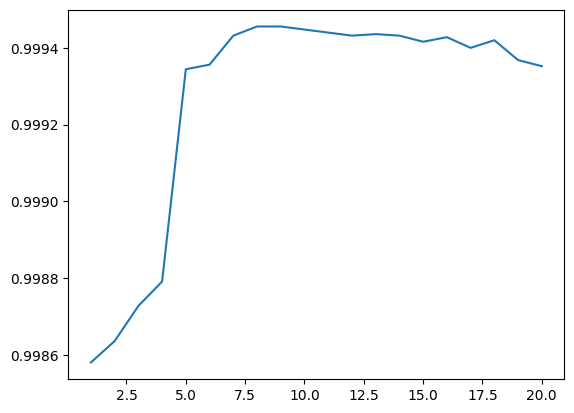

In [353]:
#making decision tree with max depths from 1-20, to see which has the best score, and adding those scores to the score_ list
score_= []
for i in range(1, 21):
    aTreeClassifier = tree.DecisionTreeClassifier(max_depth=i)
    aTreeClassifier = aTreeClassifier.fit(X_train, Y_train)
    Y_pred = aTreeClassifier.predict( X_test )
    score_.append(aTreeClassifier.score(X_test, Y_test))
#plots size of tree against score
axis = plt.plot(range(1,21), score_)

In [354]:
#here we can kind of get a picture of where the model begins to overfit, around 6/7 would be the highest score
#without overfitting because that is where the line flattens out

In [355]:
#showing the scores for the depth of 7
aTreeClassifier = tree.DecisionTreeClassifier(max_depth=7)
aTreeClassifier = aTreeClassifier.fit(X_train, Y_train)
Y_pred = aTreeClassifier.predict( X_test )
print(classification_report(Y_test, Y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.999     1.000     1.000    251227
           1      0.954     0.627     0.757       362

    accuracy                          0.999    251589
   macro avg      0.977     0.814     0.878    251589
weighted avg      0.999     0.999     0.999    251589



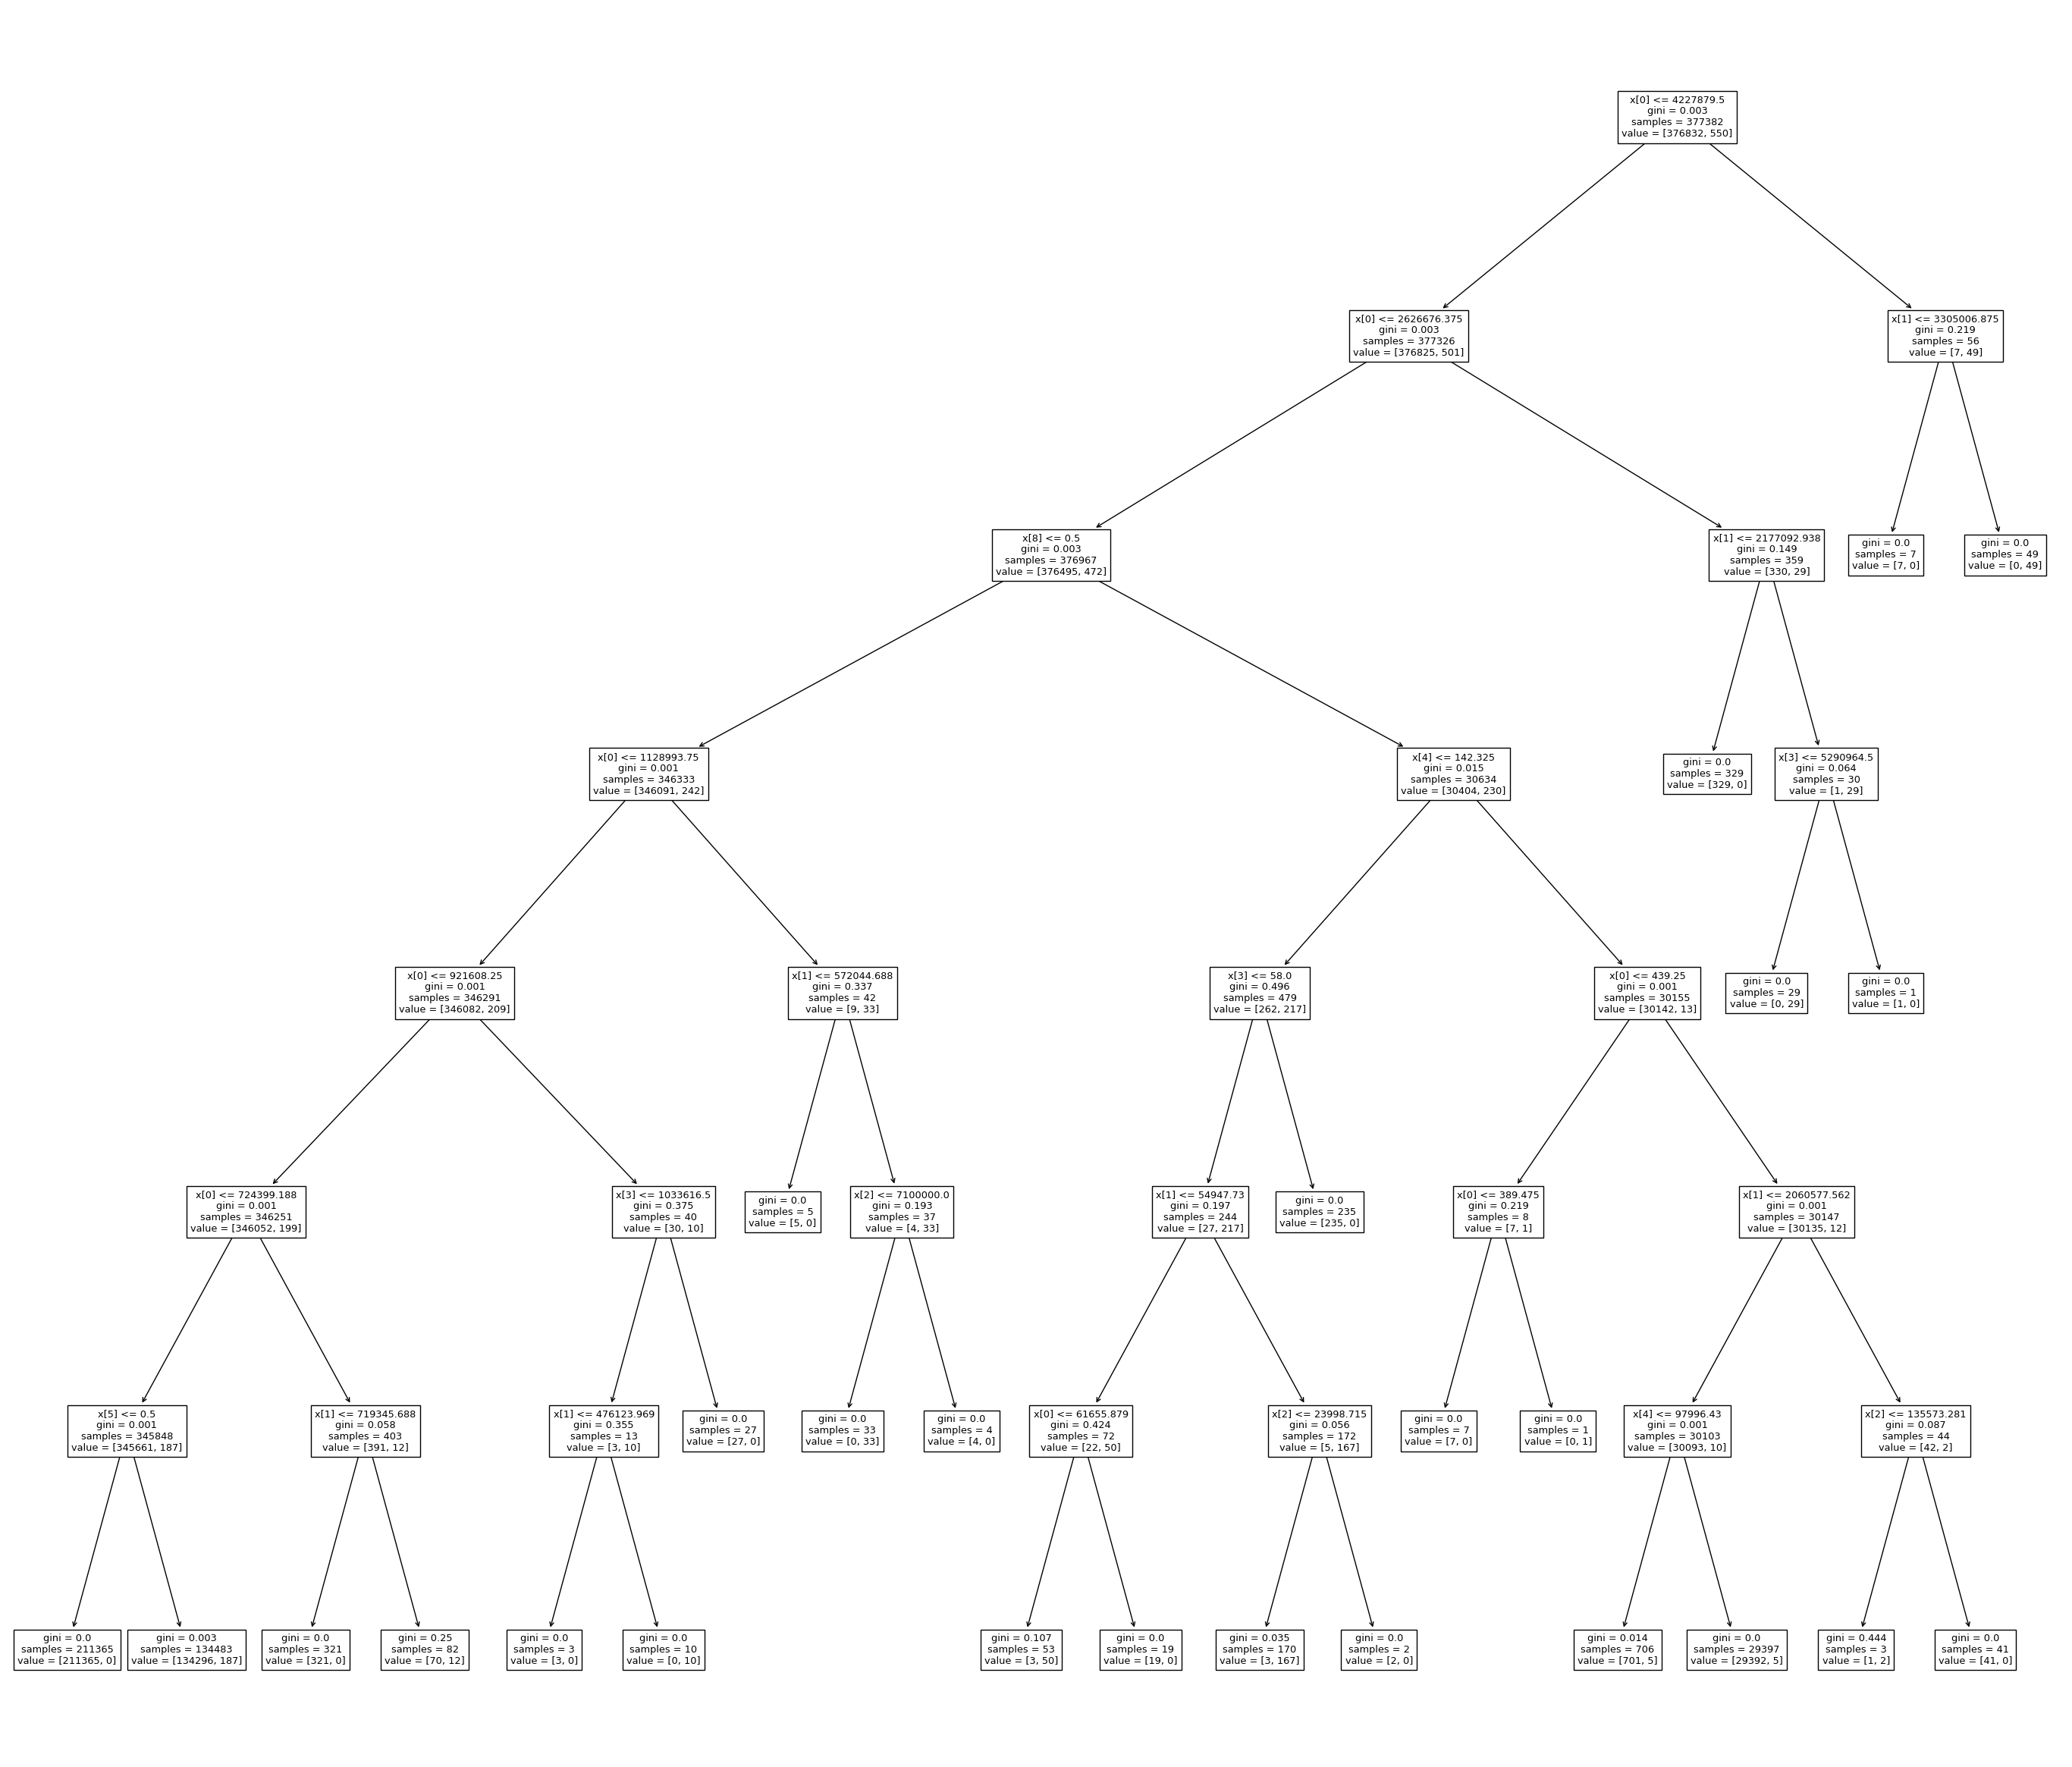

In [356]:
#visualize the tree
fig = plt.figure(figsize=(35,30))
textoutput = tree.plot_tree( aTreeClassifier )

In [357]:
#printing out the test and train f1 and auc for the max depth 7 gini tree
cv_results = cross_validate(tree.DecisionTreeClassifier(max_depth=7), X=X_train, y=Y_train, cv=10, return_train_score=True, scoring=('f1', 'roc_auc') ) # check the 'scoring' options in https://scikit-learn.org/stable/modules/model_evaluation.html
print( cv_results['train_f1'] )
print( cv_results['test_f1'] )
print( cv_results['train_roc_auc'] )
print( cv_results['test_roc_auc'] )

[0.75413712 0.76296296 0.75836431 0.75990099 0.76143387 0.7552795
 0.76600985 0.75870647 0.75682382 0.76695438]
[0.77894737 0.72727273 0.72527473 0.75       0.75       0.8172043
 0.69767442 0.72527473 0.76595745 0.71264368]
[0.97117946 0.93684944 0.93605192 0.93654687 0.93585319 0.93544628
 0.93789379 0.93572861 0.9340696  0.93723224]
[0.96152864 0.9243817  0.9369752  0.93693491 0.92410733 0.94379308
 0.91626921 0.93988946 0.9409191  0.92777645]


Text(0.5, 1.0, 'Confusion Matrix')

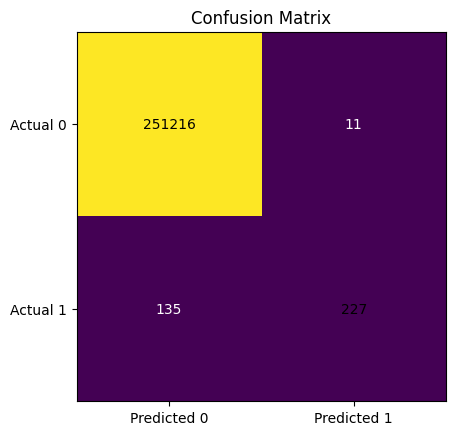

In [358]:
#plot a confusion matrix of the current tree
cm = confusion_matrix(Y_test, Y_pred)

columns = ["Predicted 0", "Predicted 1"]
rows = ["Actual 0", "Actual 1"]

plt.imshow( cm )

# Show all ticks and label them with the respective list entries
plt.xticks(np.arange(len(columns)), labels=columns)
plt.yticks(np.arange(len(rows)), labels=rows)

# Loop over data dimensions and create text annotations.
for i in range(len(columns)):
    for j in range(len(rows)):
        if i == j:
            c = 'black'
        else:
            c = 'white'
        text = plt.text(j, i, cm[i, j], ha="center", va="center", color=c)

plt.title( 'Confusion Matrix' )

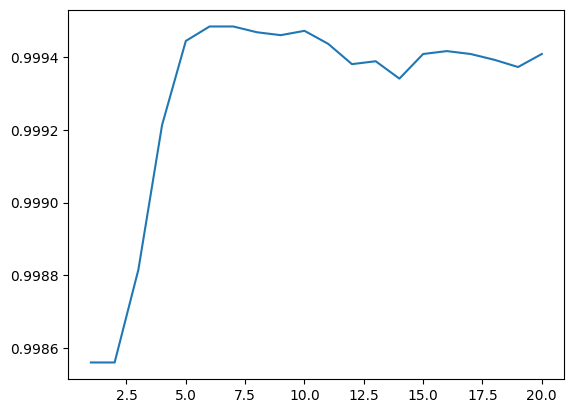

In [359]:
#making a new decision tree with max depths from 1-20, to see which has the best score, and adding those scores to the score_ list
#the difference between this one and last one is that now the tree is using entropy
score_= []
for i in range(1, 21):
    aTreeClassifier = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=i)
    aTreeClassifier = aTreeClassifier.fit(X_train, Y_train)
    Y_pred = aTreeClassifier.predict( X_test )
    score_.append(aTreeClassifier.score(X_test, Y_test))
#plots size of tree to score
axis = plt.plot(range(1,21), score_)

In [360]:
#using the plot to see where the overfitting starts to occur, I think about 6, because thats where the line flattens out.
#then shows the scores from the classifier
aTreeClassifier = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=6)
aTreeClassifier = aTreeClassifier.fit(X_train, Y_train)
Y_pred = aTreeClassifier.predict( X_test )
print(classification_report(Y_test, Y_pred, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000    251227
           1      0.975     0.657     0.785       362

    accuracy                          0.999    251589
   macro avg      0.987     0.829     0.893    251589
weighted avg      0.999     0.999     0.999    251589



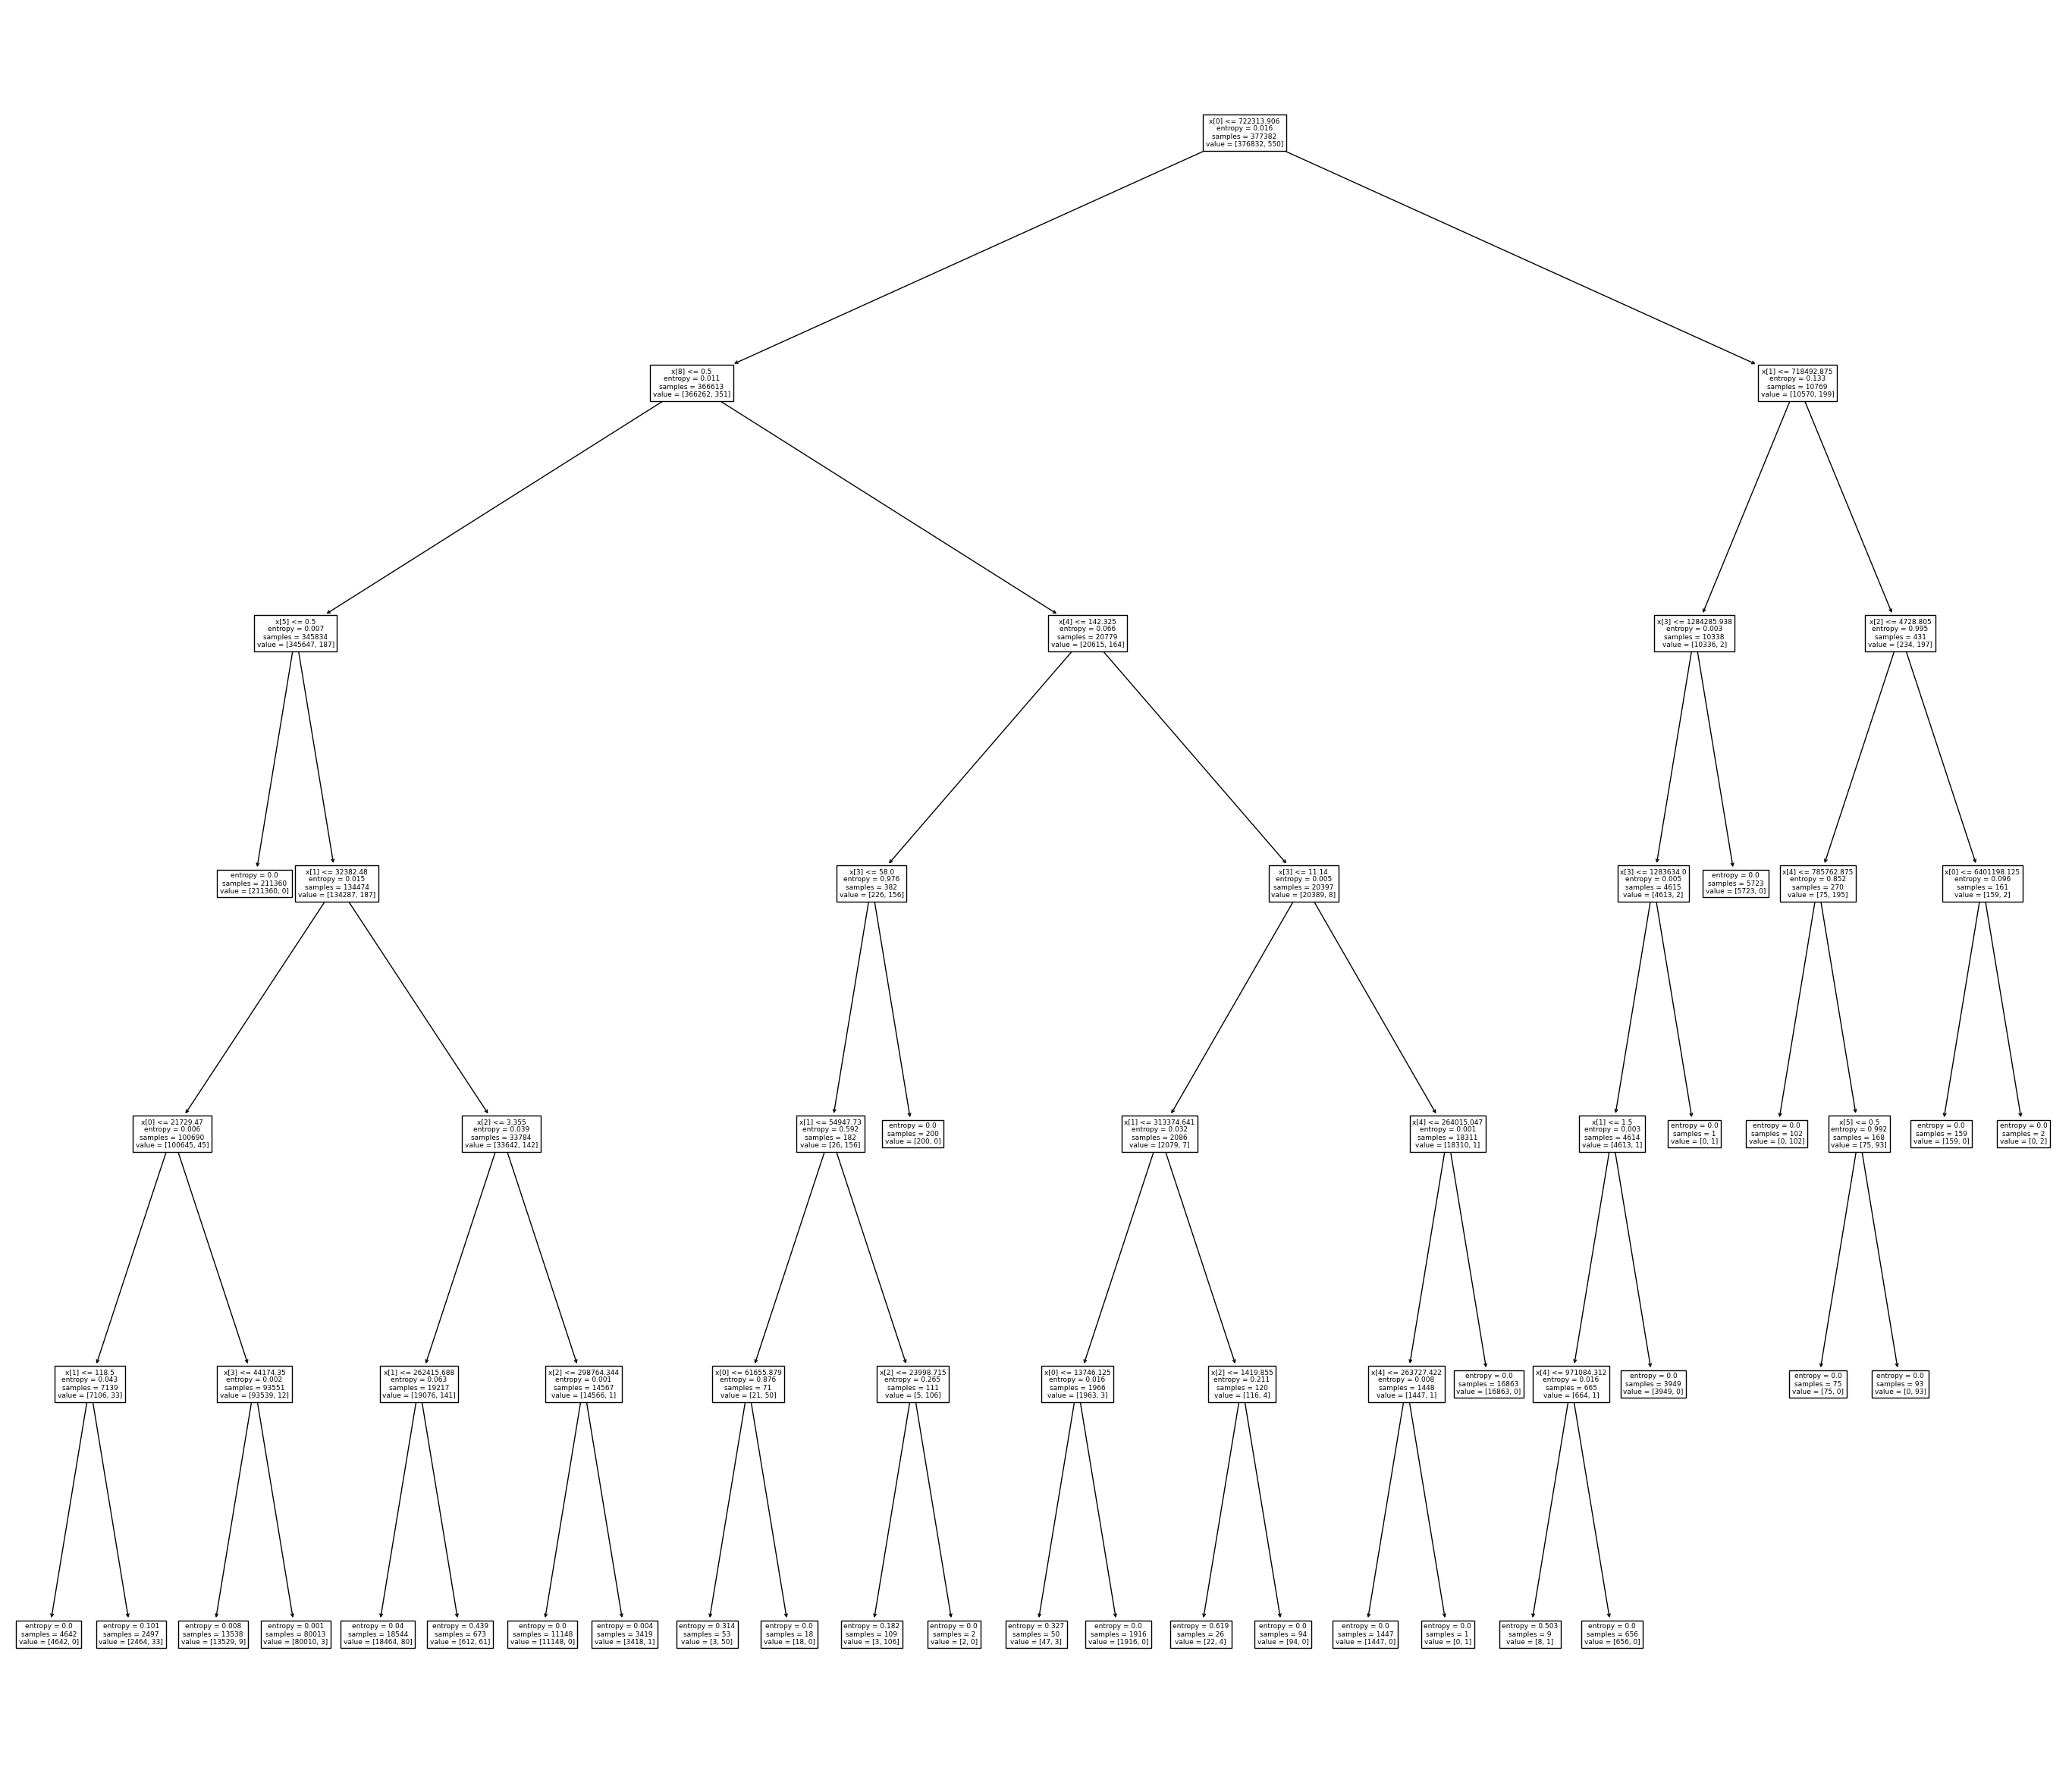

In [361]:
#plot the best entropy tree with max depth 6
fig = plt.figure(figsize=(35,30))
textoutput = tree.plot_tree( aTreeClassifier )

In [362]:
#printing the test and train f1 and auc for the best entropy tree
cv_results = cross_validate(tree.DecisionTreeClassifier(criterion = "entropy", max_depth=6), X=X_train, y=Y_train, cv=10, return_train_score=True, scoring=('f1', 'roc_auc') ) # check the 'scoring' options in https://scikit-learn.org/stable/modules/model_evaluation.html
# print( cv_results )
print( cv_results['train_f1'] )
print( cv_results['test_f1'] )
print( cv_results['train_roc_auc'] )
print( cv_results['test_roc_auc'] )


[0.77655678 0.78545455 0.77899878 0.78398058 0.77953715 0.77804878
 0.78934625 0.77696078 0.7810219  0.7819732 ]
[0.80434783 0.75       0.77419355 0.76404494 0.76923077 0.8172043
 0.70454545 0.78723404 0.7755102  0.75555556]
[0.99366486 0.99232139 0.99213591 0.99244059 0.99304078 0.99236609
 0.99338744 0.99213805 0.9922684  0.99244   ]
[0.98981096 0.97062173 0.97707744 0.97962814 0.97904432 0.99238986
 0.9725227  0.98026238 0.99418933 0.98088817]


Text(0.5, 1.0, 'Confusion Matrix')

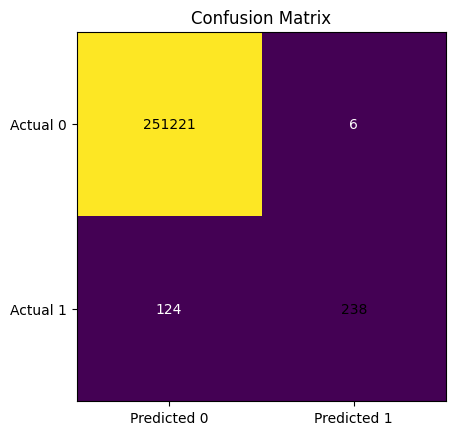

In [363]:
#making a confusion matrix for the entropy tree with max depth 6
cm = confusion_matrix(Y_test, Y_pred)

columns = ["Predicted 0", "Predicted 1"]
rows = ["Actual 0", "Actual 1"]

plt.imshow( cm )

# Show all ticks and label them with the respective list entries
plt.xticks(np.arange(len(columns)), labels=columns)
plt.yticks(np.arange(len(rows)), labels=rows)

# Loop over data dimensions and create text annotations.
for i in range(len(columns)):
    for j in range(len(rows)):
        if i == j:
            c = 'black'
        else:
            c = 'white'
        text = plt.text(j, i, cm[i, j], ha="center", va="center", color=c)

plt.title( 'Confusion Matrix' )

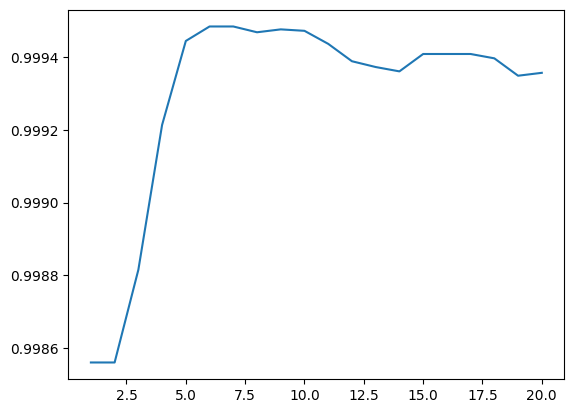

In [364]:
#finally testing with the log loss criterion
#making decision tree with max depths from 1-20, to see which has the best score, and adding those scores to the score_ list
#the difference between this one and last one is that now the tree is using entropy
score_= []
for i in range(1, 21):
    aTreeClassifier = tree.DecisionTreeClassifier(criterion = "log_loss", max_depth=i)
    aTreeClassifier = aTreeClassifier.fit(X_train, Y_train)
    Y_pred = aTreeClassifier.predict( X_test )
    score_.append(aTreeClassifier.score(X_test, Y_test))
#plots size of tree to score
axis = plt.plot(range(1,21), score_)

In [365]:
#using the plot to see where the overfitting starts to occur, I think about 6, because thats where the line flattens out
#then shows the score
aTreeClassifier = tree.DecisionTreeClassifier(criterion = "log_loss", max_depth=6)
aTreeClassifier = aTreeClassifier.fit(X_train, Y_train)
Y_pred = aTreeClassifier.predict( X_test )
print(classification_report(Y_test, Y_pred, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000    251227
           1      0.975     0.657     0.785       362

    accuracy                          0.999    251589
   macro avg      0.987     0.829     0.893    251589
weighted avg      0.999     0.999     0.999    251589



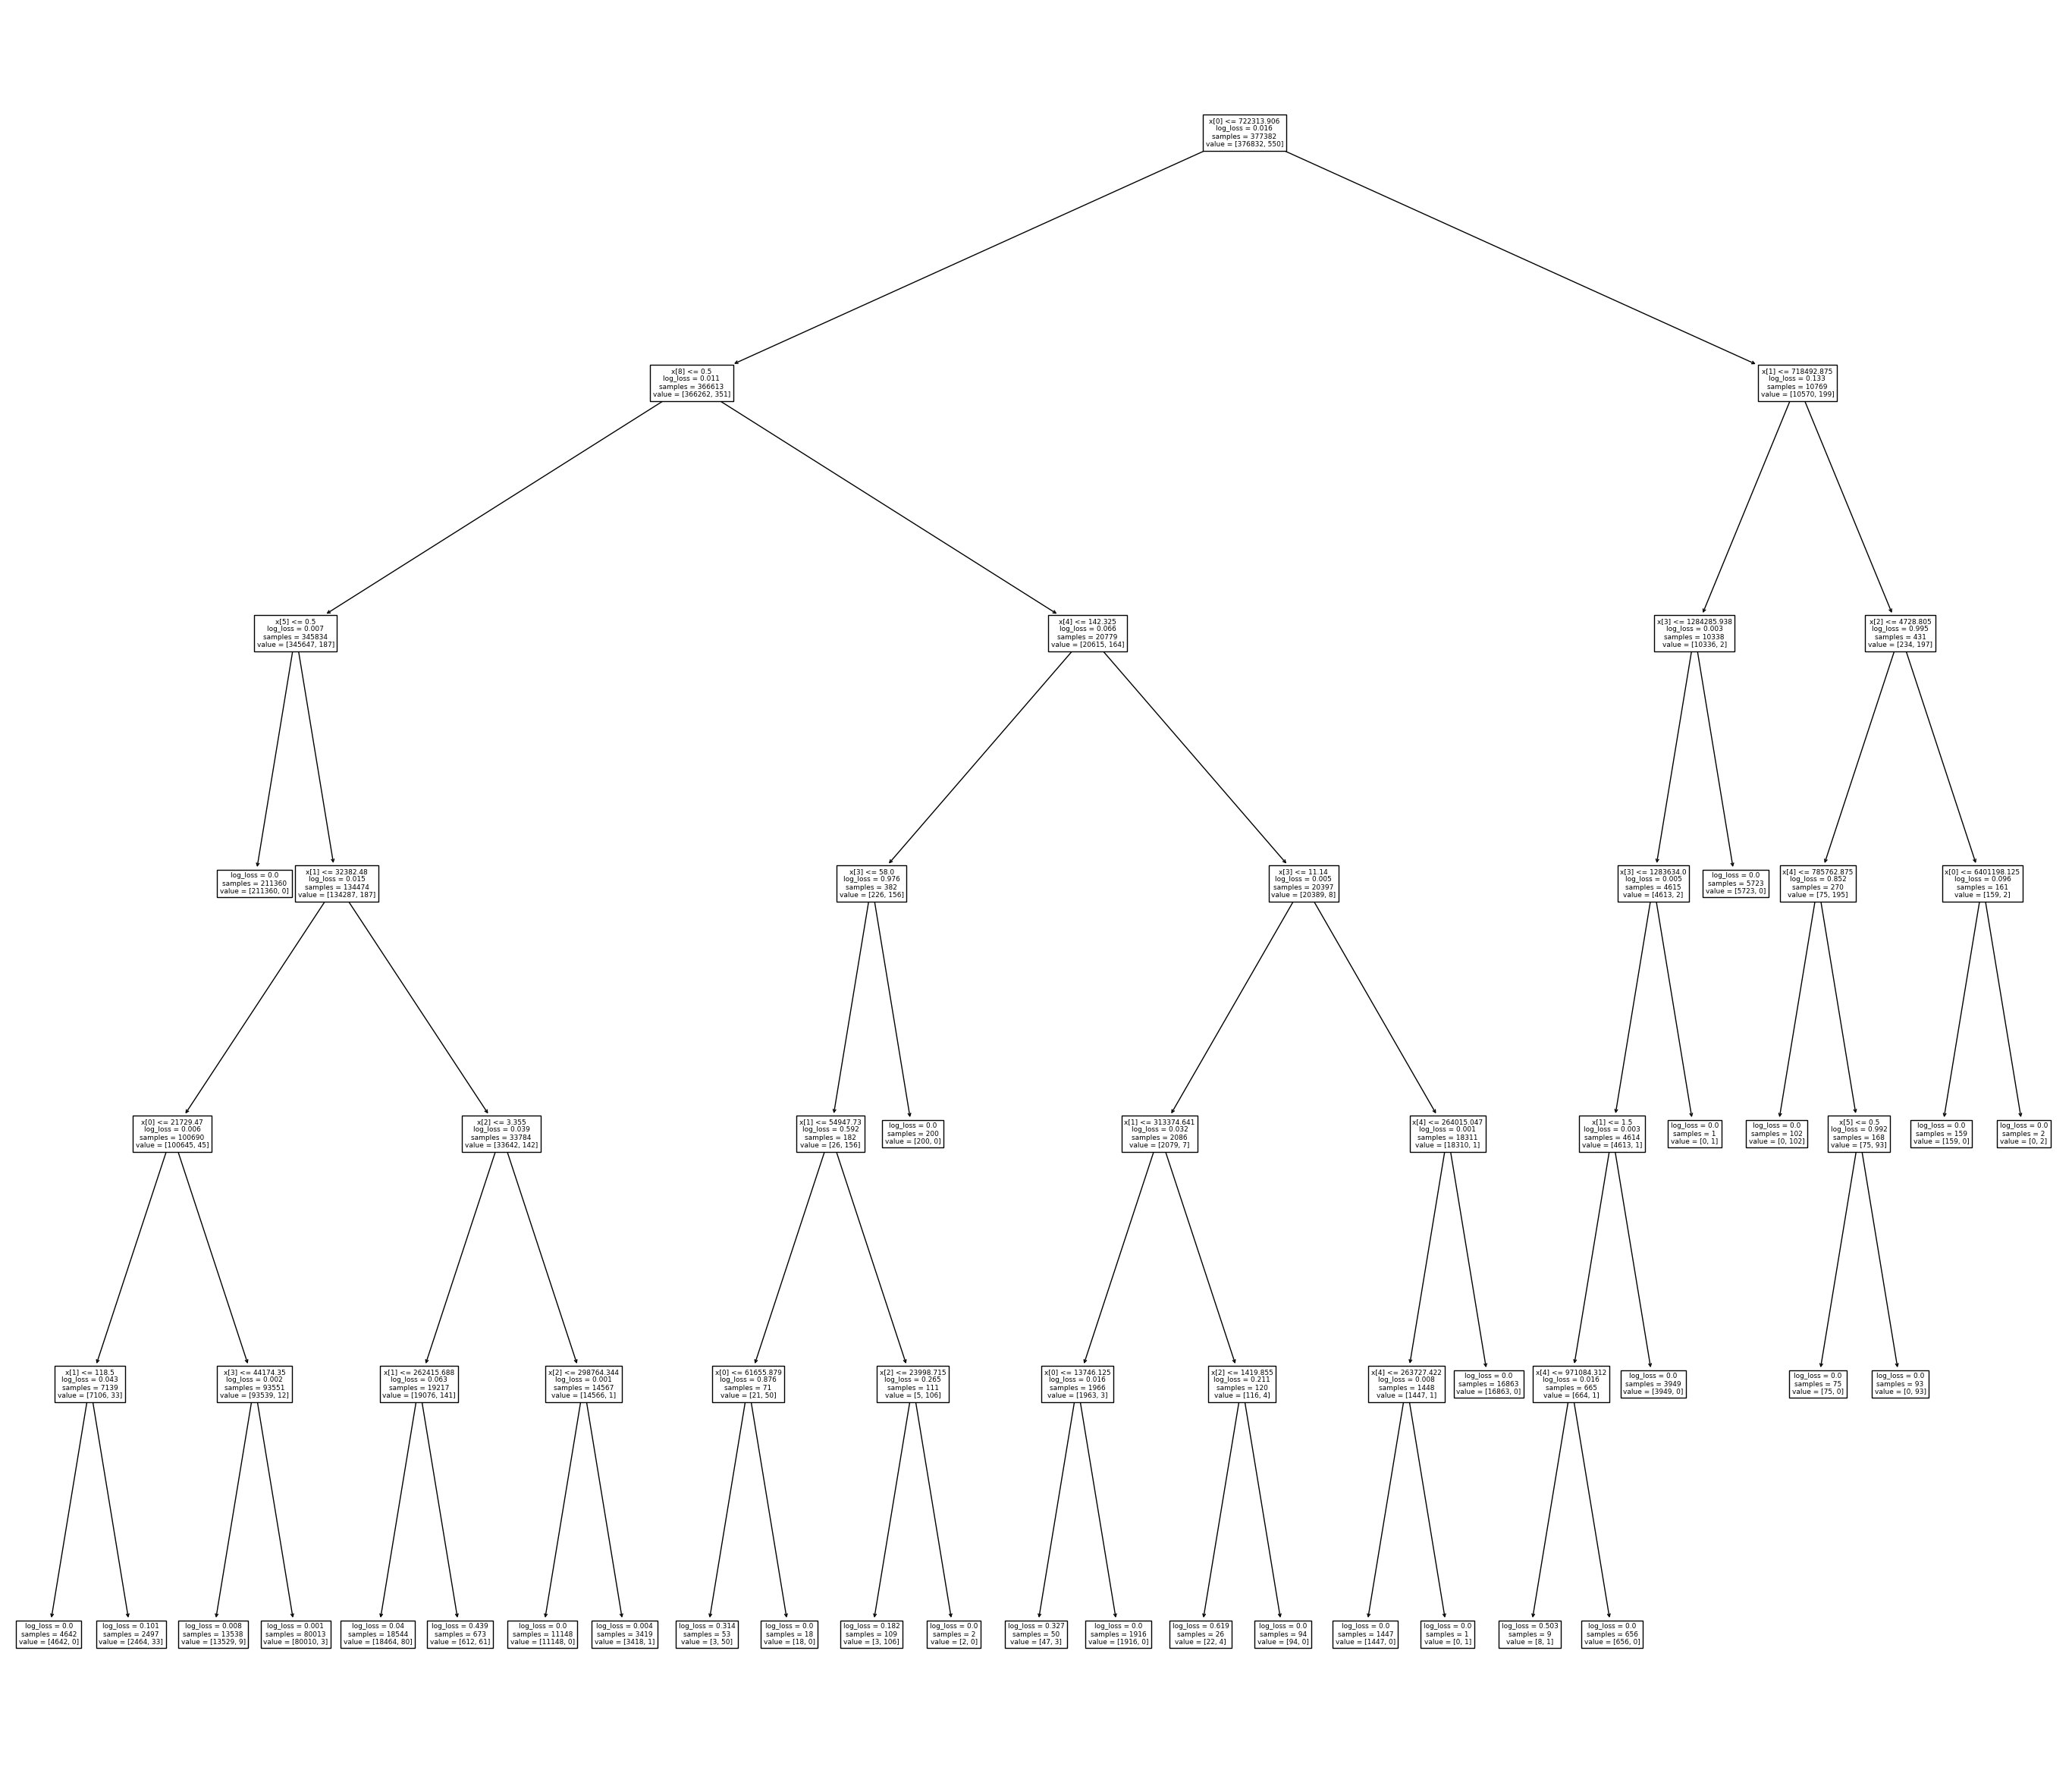

In [366]:
#plot the best log_loss tree with max depth 6
fig = plt.figure(figsize=(35,30))
textoutput = tree.plot_tree( aTreeClassifier )

In [367]:
#printing the test and train f1 and auc for log_loss tree
cv_results = cross_validate(tree.DecisionTreeClassifier(criterion = "entropy", max_depth=6), X=X_train, y=Y_train, cv=10, return_train_score=True, scoring=('f1', 'roc_auc') ) # check the 'scoring' options in https://scikit-learn.org/stable/modules/model_evaluation.html
# print( cv_results )
print( cv_results['train_f1'] )
print( cv_results['test_f1'] )
print( cv_results['train_roc_auc'] )
print( cv_results['test_roc_auc'] )

[0.77655678 0.78545455 0.77899878 0.78398058 0.77953715 0.77804878
 0.78934625 0.77696078 0.7810219  0.7819732 ]
[0.80434783 0.75       0.77419355 0.76404494 0.76923077 0.8172043
 0.70454545 0.78723404 0.7755102  0.75555556]
[0.99366486 0.99232139 0.99213591 0.99244059 0.99304078 0.99236609
 0.99338744 0.99213805 0.9922684  0.99244   ]
[0.98981096 0.97062173 0.97707744 0.97962814 0.97904432 0.99238986
 0.9725227  0.98026238 0.99418933 0.98088817]


Text(0.5, 1.0, 'Confusion Matrix')

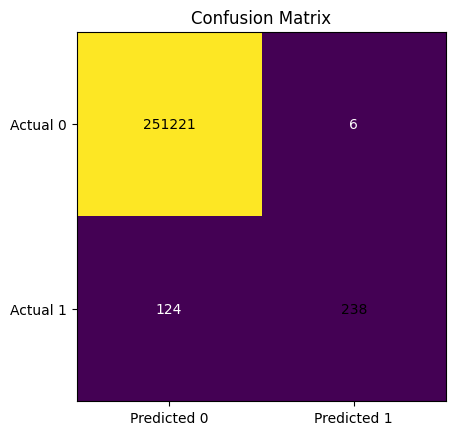

In [368]:
#making a confusion matrix for the log_loss tree with max depth 6
cm = confusion_matrix(Y_test, Y_pred)

columns = ["Predicted 0", "Predicted 1"]
rows = ["Actual 0", "Actual 1"]

plt.imshow( cm )

# Show all ticks and label them with the respective list entries
plt.xticks(np.arange(len(columns)), labels=columns)
plt.yticks(np.arange(len(rows)), labels=rows)

# Loop over data dimensions and create text annotations.
for i in range(len(columns)):
    for j in range(len(rows)):
        if i == j:
            c = 'black'
        else:
            c = 'white'
        text = plt.text(j, i, cm[i, j], ha="center", va="center", color=c)

plt.title( 'Confusion Matrix' )

In [369]:
#note that entropy and log_loss are interchangeable in this case, which is why the trees and predictions are the same

In [303]:
#here i am testing the method of pruning a full sized tree, pruning by cost complexity pruning path
full_tree = tree.DecisionTreeClassifier(criterion = "entropy")
ccp_alpha = full_tree.cost_complexity_pruning_path(X_train, Y_train)["ccp_alphas"]

In [304]:
#listing the alpha values calculated
ccp_alpha

array([0.00000000e+00, 3.53311322e-06, 3.64999855e-06, 3.64999855e-06,
       4.29950620e-06, 4.78247568e-06, 5.16735633e-06, 5.29966983e-06,
       5.29966983e-06, 5.29966983e-06, 5.29966983e-06, 5.47499782e-06,
       6.09161447e-06, 6.22317849e-06, 6.43214697e-06, 6.59868514e-06,
       6.73875056e-06, 7.03311077e-06, 7.06622644e-06, 7.29999709e-06,
       7.29999709e-06, 7.29999709e-06, 7.29999709e-06, 7.29999709e-06,
       8.00494457e-06, 8.27146616e-06, 8.56722046e-06, 8.59901240e-06,
       8.59901240e-06, 8.83914837e-06, 8.86000389e-06, 9.11257103e-06,
       9.11257103e-06, 9.46463192e-06, 9.56495136e-06, 9.56495136e-06,
       9.58854873e-06, 9.67583100e-06, 9.67712485e-06, 9.83161482e-06,
       9.94983201e-06, 1.04884600e-05, 1.04884600e-05, 1.08602401e-05,
       1.09251450e-05, 1.10512157e-05, 1.12336726e-05, 1.17672344e-05,
       1.19323960e-05, 1.20019636e-05, 1.20019636e-05, 1.20019636e-05,
       1.20368963e-05, 1.24792413e-05, 1.27874202e-05, 1.28105391e-05,
      

In [305]:
#here I am building a grid search to compare the different trees based on their accuracy score
ccp_alpha_grid_search = GridSearchCV(
estimator = tree.DecisionTreeClassifier(criterion = "entropy"),
scoring = make_scorer(accuracy_score),
param_grid = ParameterGrid({"ccp_alpha": [[alpha] for alpha in ccp_alpha]}),
)

In [306]:
#giving the data to the trees
#this takes a very long time to run
ccp_alpha_grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x0000016A9DB358B0>,
             scoring=make_scorer(accuracy_score))

In [307]:
#finding the best alpha
ccp_alpha_grid_search.best_params_

{'ccp_alpha': 6.54827300416677e-05}

In [308]:
#finding the best predictor tree
best_ccp_alpha_tree = ccp_alpha_grid_search.best_estimator_

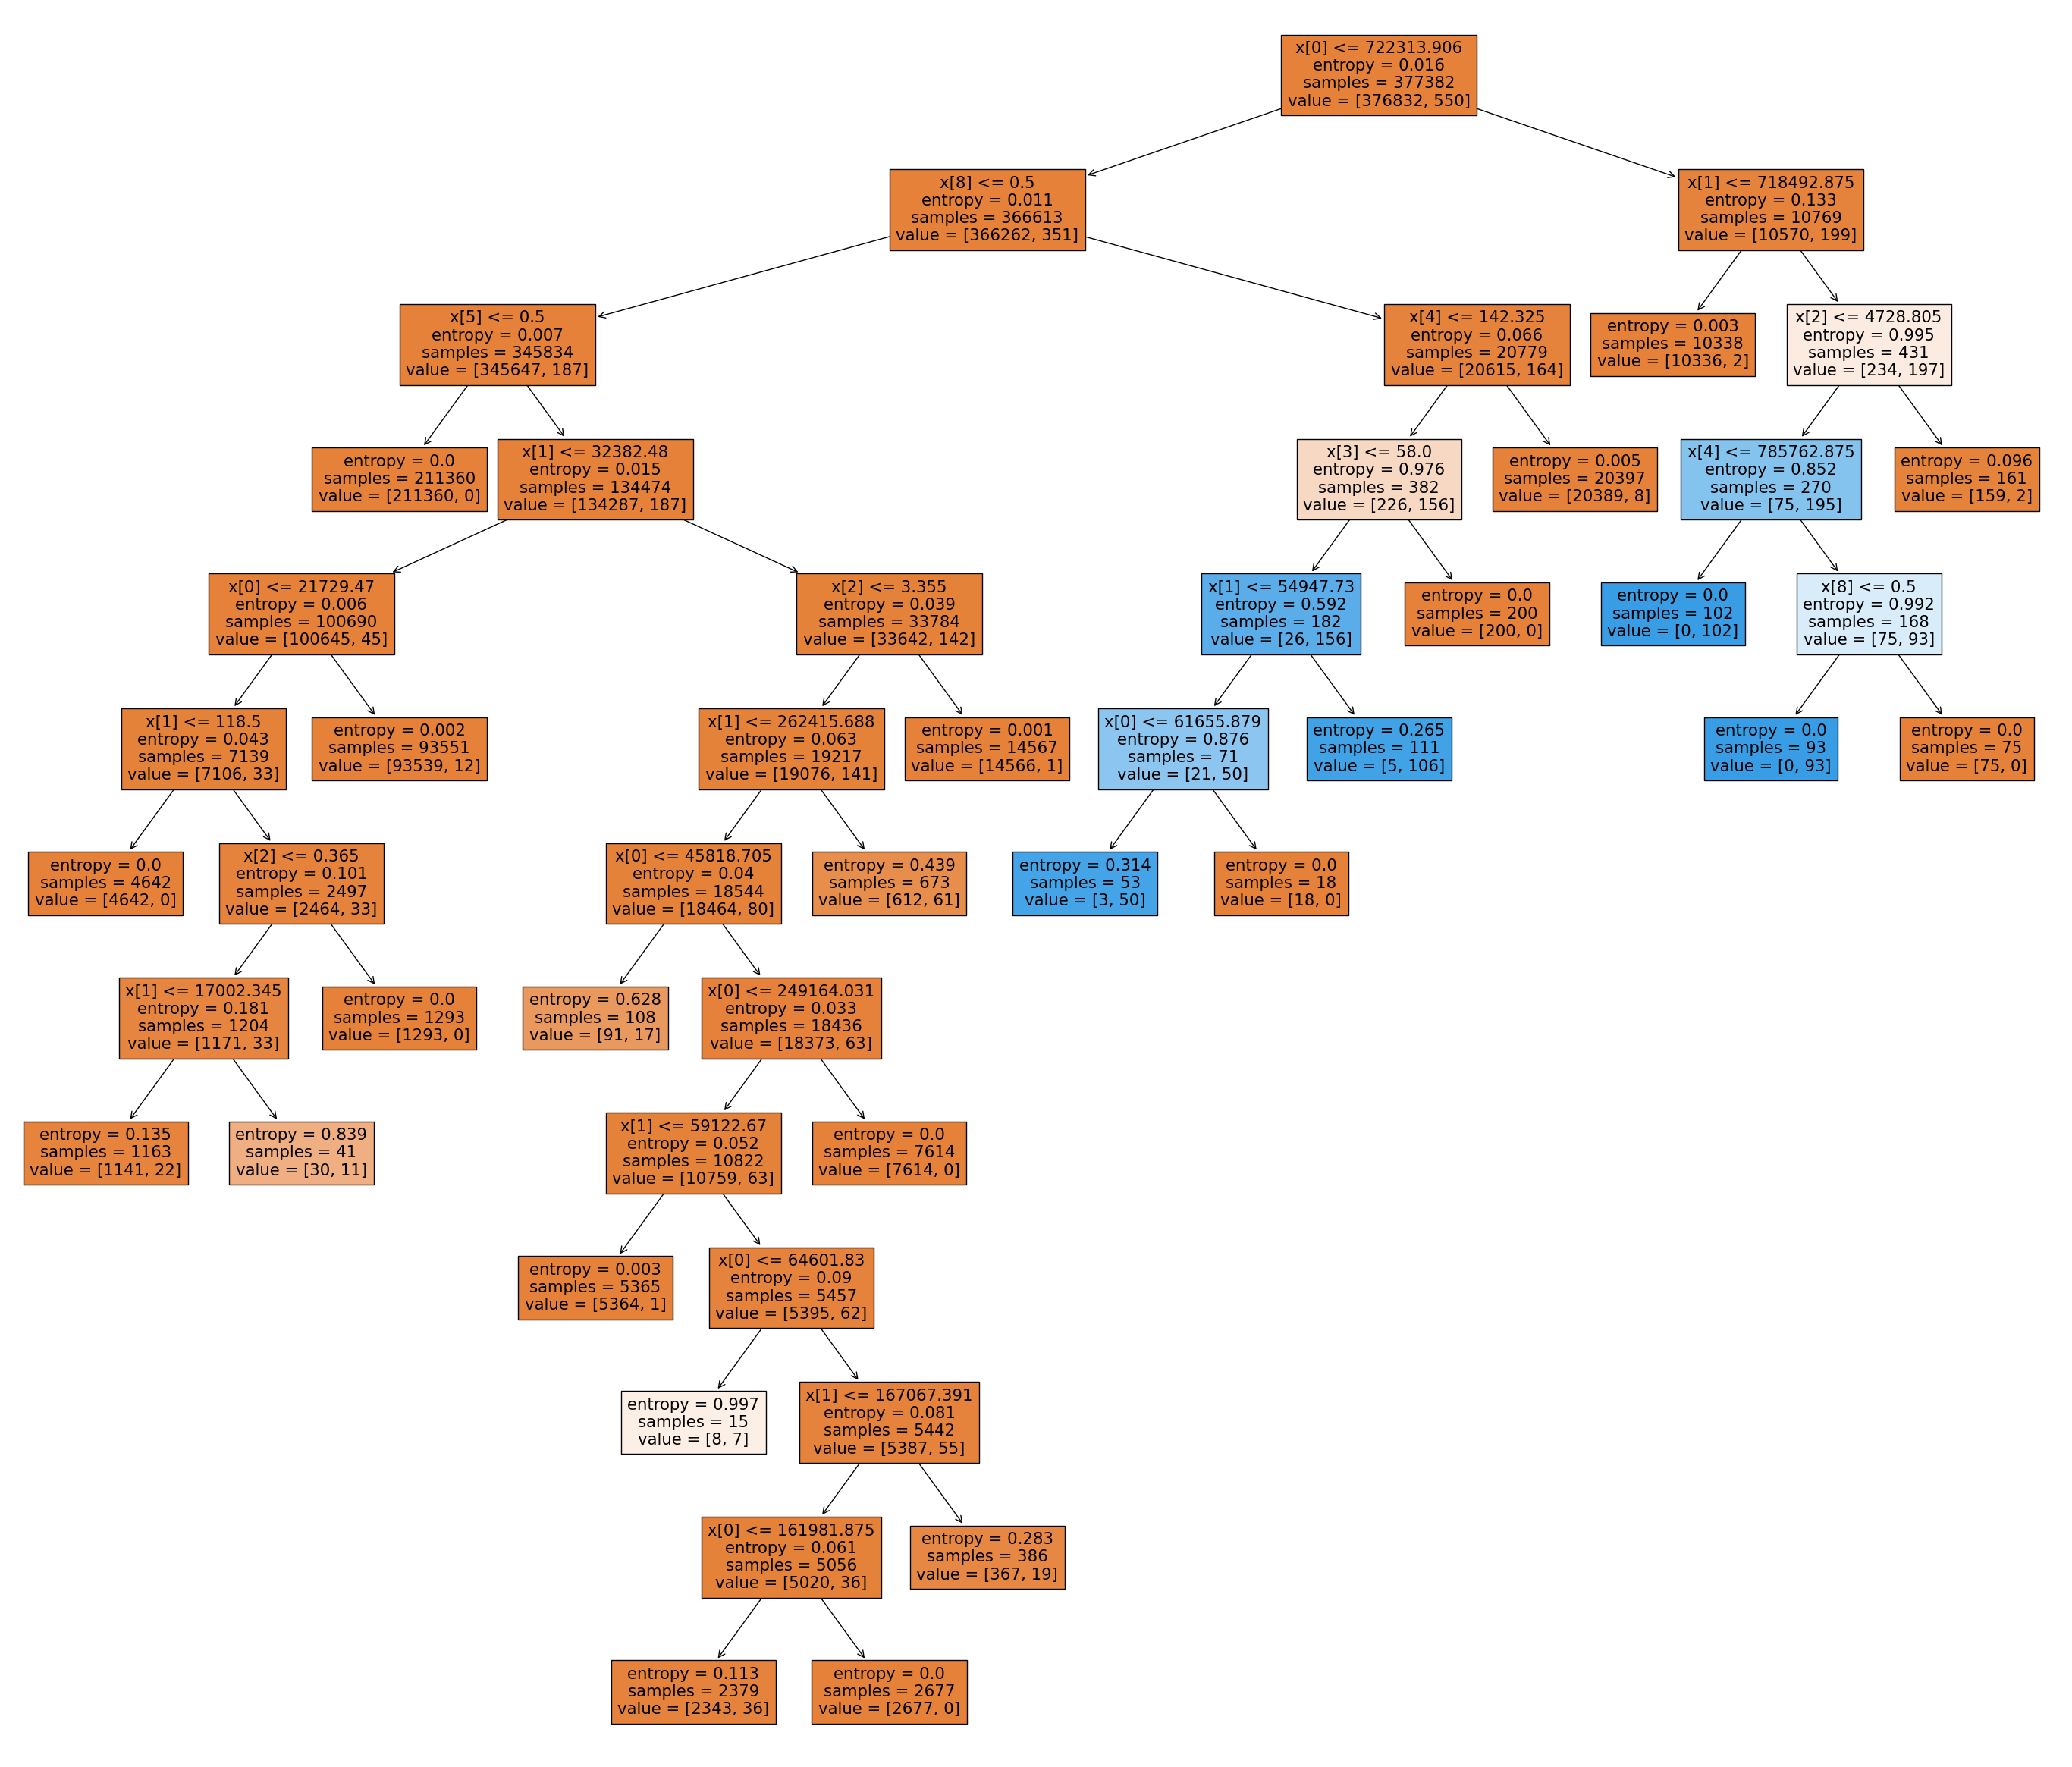

In [309]:
#visualizing the best alpha tree
plt.figure(figsize=(35,30))
plot_tree(
    best_ccp_alpha_tree,
    filled=True
)
plt.show()

In [310]:
#getting the scores for the best alpha tree
Y_pred = best_ccp_alpha_tree.predict( X_test )
print(classification_report(Y_test, Y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.999     1.000     1.000    251227
           1      0.983     0.652     0.784       362

    accuracy                          0.999    251589
   macro avg      0.991     0.826     0.892    251589
weighted avg      0.999     0.999     0.999    251589



Text(0.5, 1.0, 'Confusion Matrix')

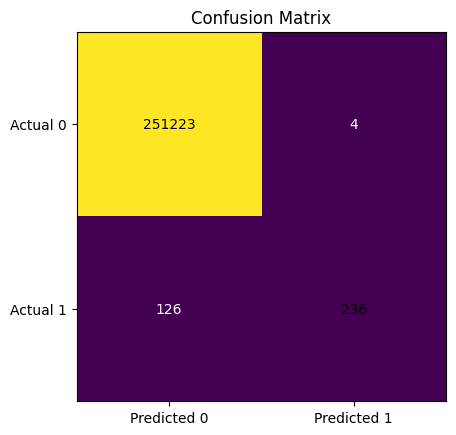

In [311]:
#building a confusion matrix for the best alpha tree
cm = confusion_matrix(Y_test, Y_pred)

columns = ["Predicted 0", "Predicted 1"]
rows = ["Actual 0", "Actual 1"]

plt.imshow( cm )

# Show all ticks and label them with the respective list entries
plt.xticks(np.arange(len(columns)), labels=columns)
plt.yticks(np.arange(len(rows)), labels=rows)

# Loop over data dimensions and create text annotations.
for i in range(len(columns)):
    for j in range(len(rows)):
        if i == j:
            c = 'black'
        else:
            c = 'white'
        text = plt.text(j, i, cm[i, j], ha="center", va="center", color=c)

plt.title( 'Confusion Matrix' )

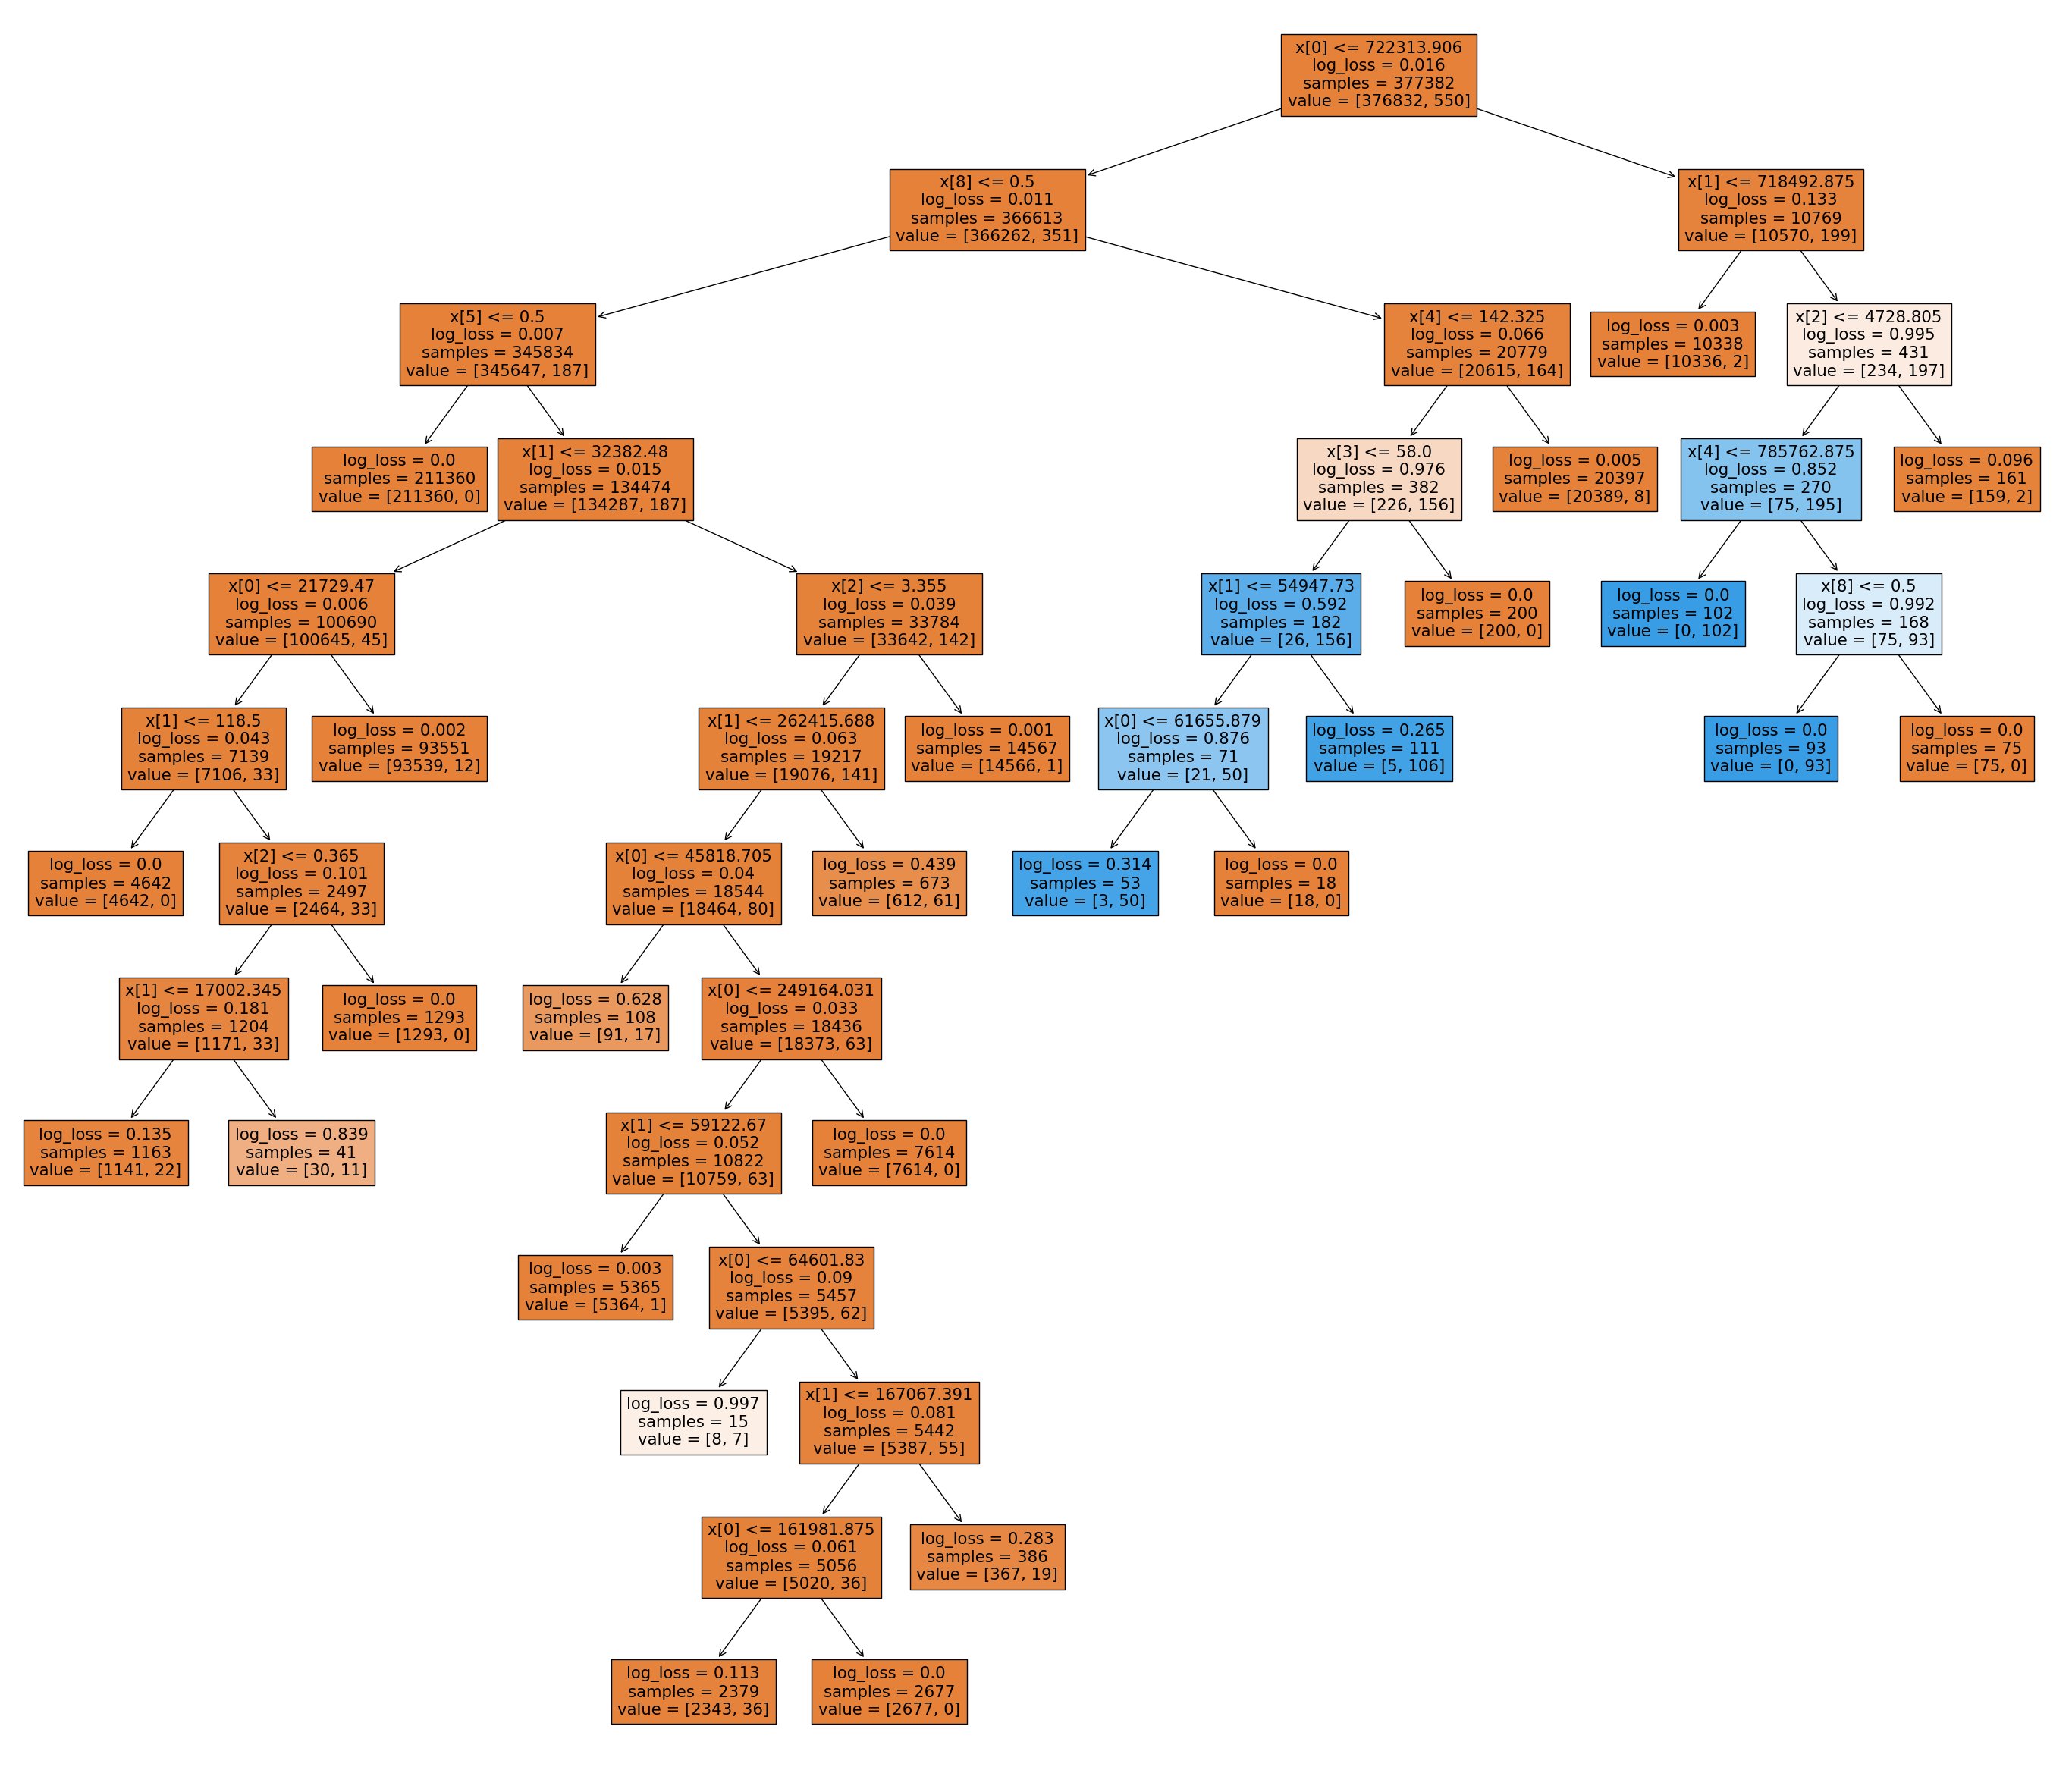

              precision    recall  f1-score   support

           0      0.999     1.000     1.000    251227
           1      0.983     0.652     0.784       362

    accuracy                          0.999    251589
   macro avg      0.991     0.826     0.892    251589
weighted avg      0.999     0.999     0.999    251589



Text(0.5, 1.0, 'Confusion Matrix')

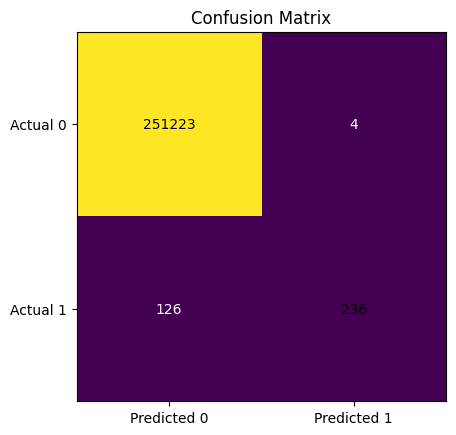

In [312]:
#doing all the same steps that I just did, except changing the criterion to log_loss
#and everything is condensed into one run
#this also takes a very long time to run

full_tree = tree.DecisionTreeClassifier(criterion = "log_loss")
ccp_alpha = full_tree.cost_complexity_pruning_path(X_train, Y_train)["ccp_alphas"]
ccp_alpha_grid_search = GridSearchCV(
estimator = tree.DecisionTreeClassifier(criterion = "log_loss"),
scoring = make_scorer(accuracy_score),
param_grid = ParameterGrid({"ccp_alpha": [[alpha] for alpha in ccp_alpha]}),
)
ccp_alpha_grid_search.fit(X_train, Y_train)
ccp_alpha_grid_search.best_params_
best_ccp_alpha_tree = ccp_alpha_grid_search.best_estimator_

plt.figure(figsize=(35,30))
plot_tree(
    best_ccp_alpha_tree,
    filled=True
)
plt.show()
Y_pred = best_ccp_alpha_tree.predict( X_test )
print(classification_report(Y_test, Y_pred, digits = 3))

cm = confusion_matrix(Y_test, Y_pred)

columns = ["Predicted 0", "Predicted 1"]
rows = ["Actual 0", "Actual 1"]

plt.imshow( cm )

# Show all ticks and label them with the respective list entries
plt.xticks(np.arange(len(columns)), labels=columns)
plt.yticks(np.arange(len(rows)), labels=rows)

# Loop over data dimensions and create text annotations.
for i in range(len(columns)):
    for j in range(len(rows)):
        if i == j:
            c = 'black'
        else:
            c = 'white'
        text = plt.text(j, i, cm[i, j], ha="center", va="center", color=c)

plt.title( 'Confusion Matrix' )

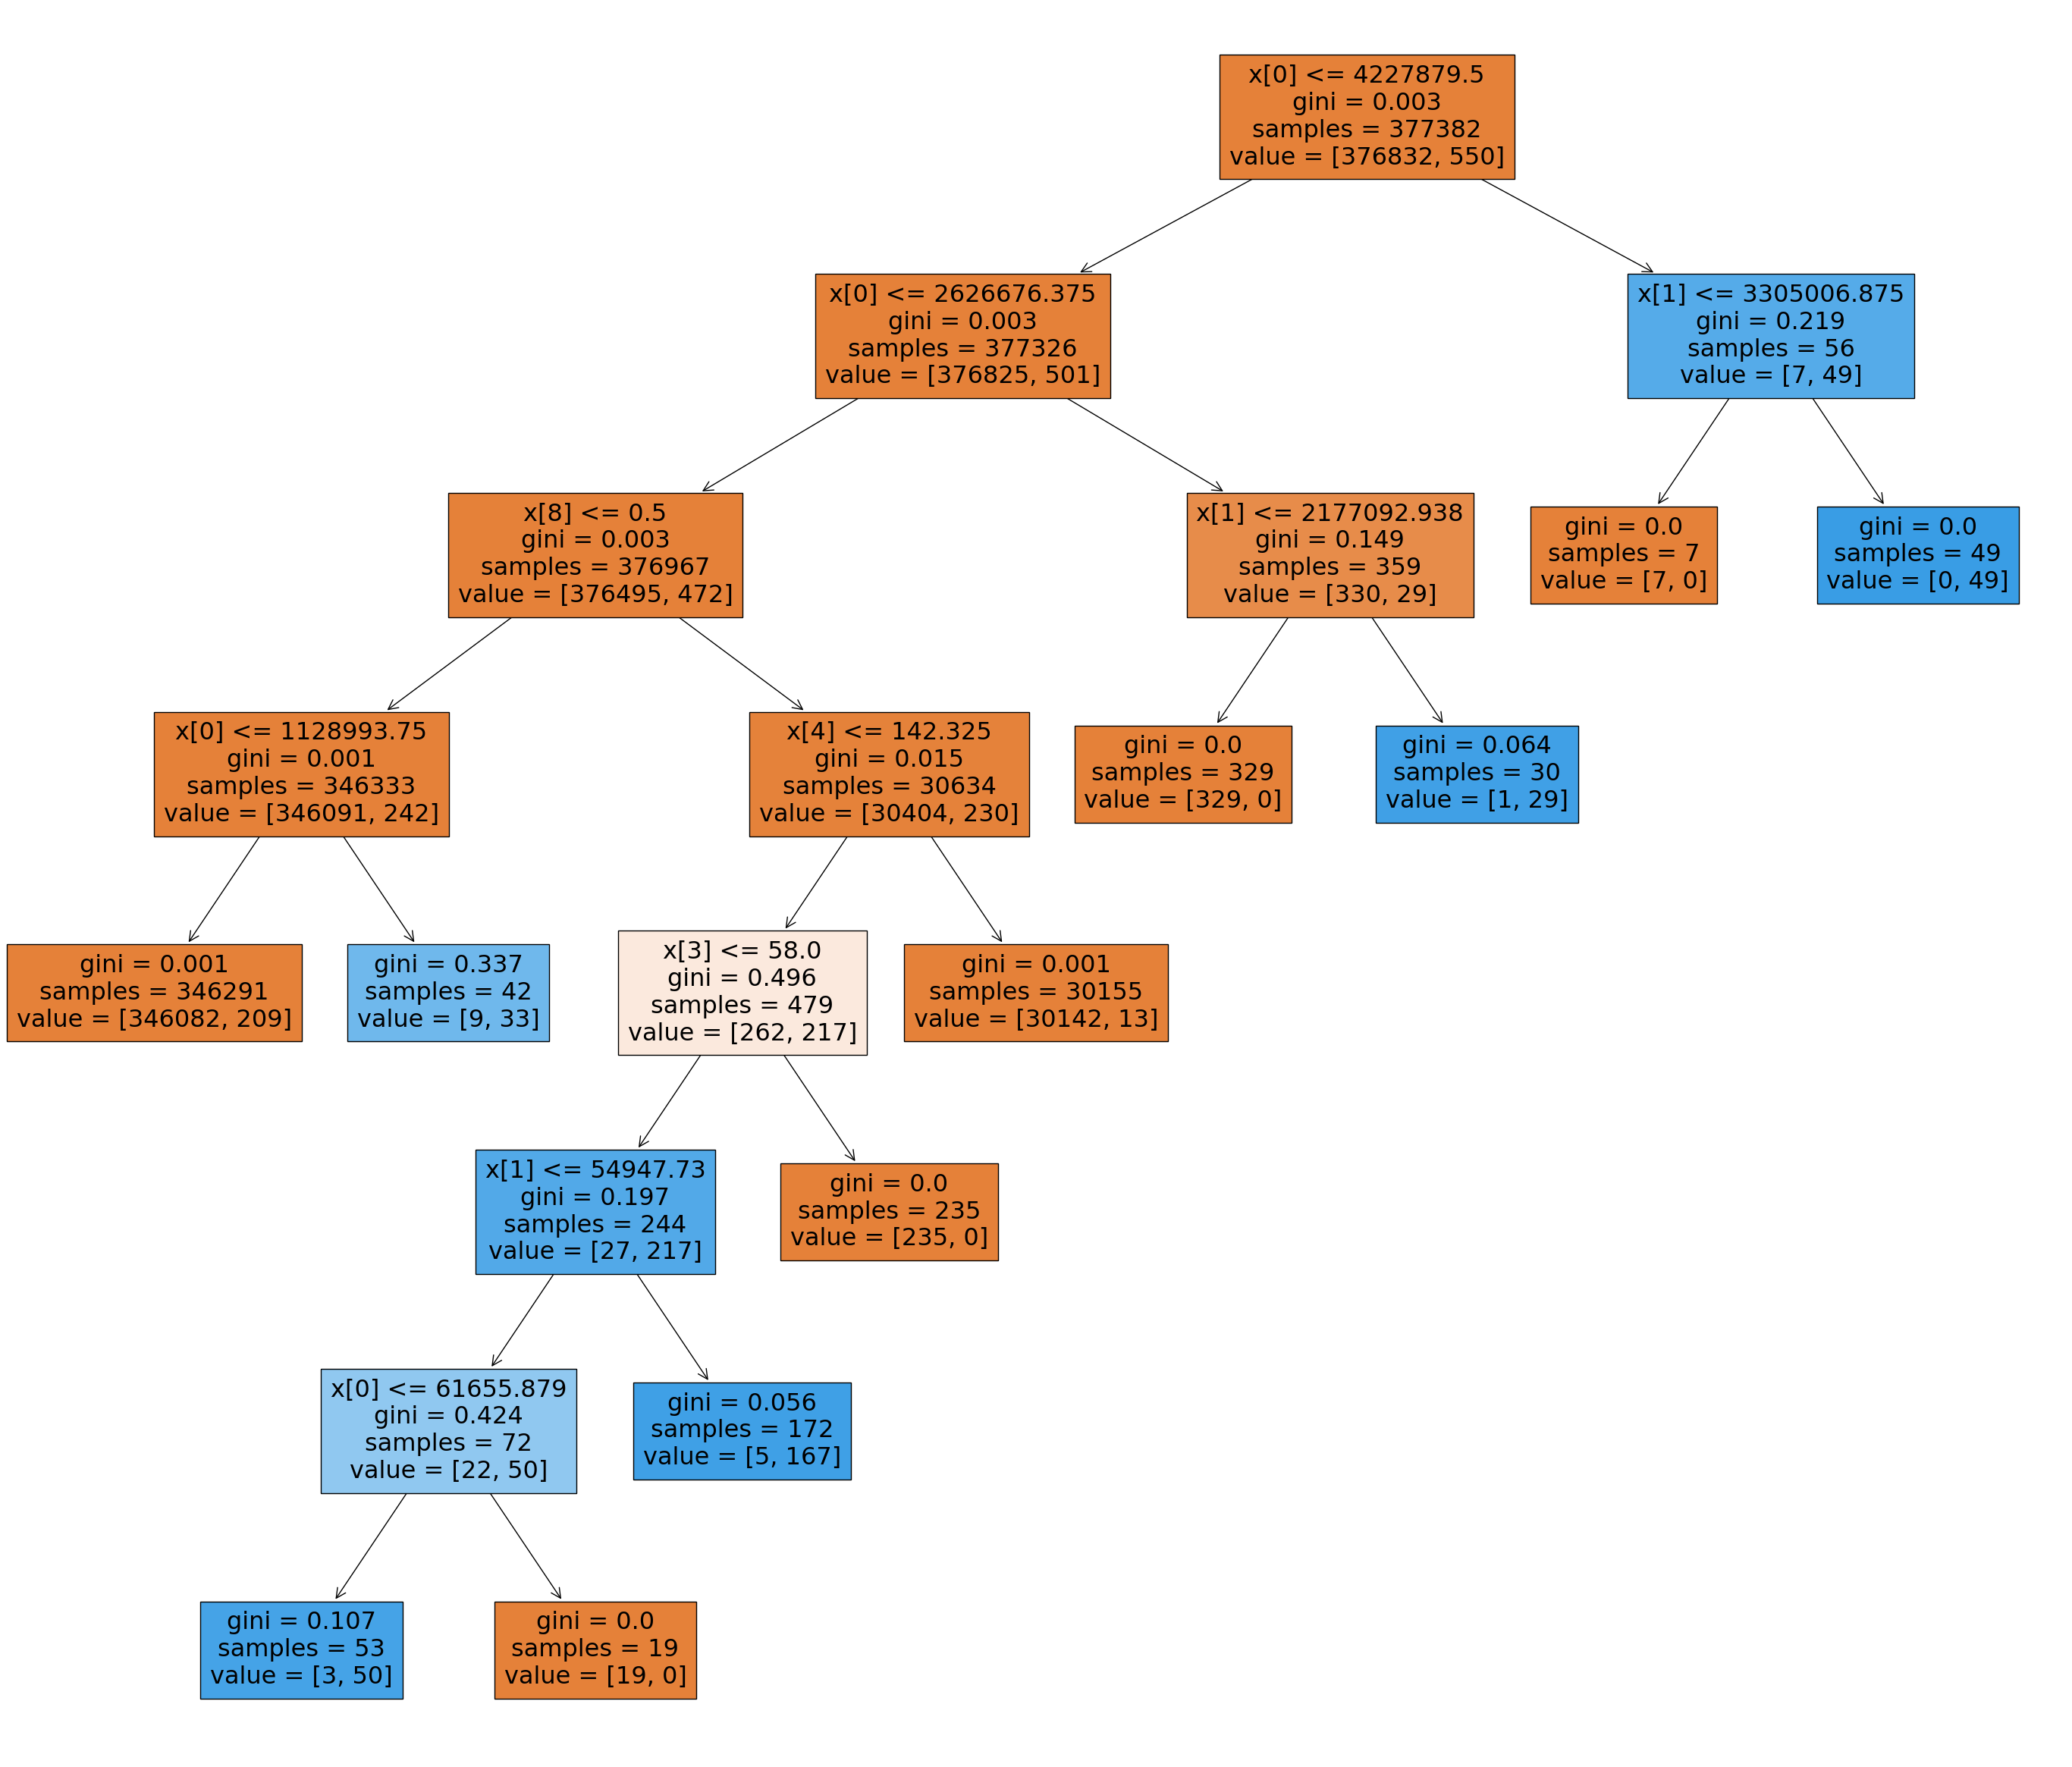

              precision    recall  f1-score   support

           0      0.999     1.000     1.000    251227
           1      0.948     0.602     0.736       362

    accuracy                          0.999    251589
   macro avg      0.974     0.801     0.868    251589
weighted avg      0.999     0.999     0.999    251589



Text(0.5, 1.0, 'Confusion Matrix')

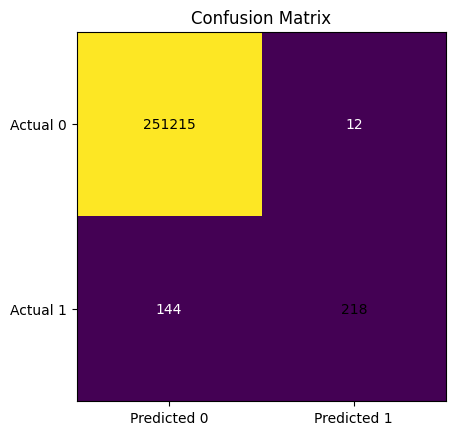

In [313]:
#doing all the same steps again, except changing the criterion to gini
#this also takes a very long time to run
full_tree = tree.DecisionTreeClassifier()
ccp_alpha = full_tree.cost_complexity_pruning_path(X_train, Y_train)["ccp_alphas"]
ccp_alpha_grid_search = GridSearchCV(
estimator = tree.DecisionTreeClassifier(),
scoring = make_scorer(accuracy_score),
param_grid = ParameterGrid({"ccp_alpha": [[alpha] for alpha in ccp_alpha]}),
)
ccp_alpha_grid_search.fit(X_train, Y_train)
ccp_alpha_grid_search.best_params_
best_ccp_alpha_tree = ccp_alpha_grid_search.best_estimator_

plt.figure(figsize=(35,30))
plot_tree(
    best_ccp_alpha_tree,
    filled=True
)
plt.show()
Y_pred = best_ccp_alpha_tree.predict( X_test )
print(classification_report(Y_test, Y_pred, digits = 3))

cm = confusion_matrix(Y_test, Y_pred)

columns = ["Predicted 0", "Predicted 1"]
rows = ["Actual 0", "Actual 1"]

plt.imshow( cm )

# Show all ticks and label them with the respective list entries
plt.xticks(np.arange(len(columns)), labels=columns)
plt.yticks(np.arange(len(rows)), labels=rows)

# Loop over data dimensions and create text annotations.
for i in range(len(columns)):
    for j in range(len(rows)):
        if i == j:
            c = 'black'
        else:
            c = 'white'
        text = plt.text(j, i, cm[i, j], ha="center", va="center", color=c)

plt.title( 'Confusion Matrix' )

In [370]:
#best from what I've tested is max depth 6 entropy tree, so that is what I will use for the predictions
aTreeClassifier = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=6)
aTreeClassifier = aTreeClassifier.fit(X_train, Y_train)
Y_pred = aTreeClassifier.predict( X_test )
print(classification_report(Y_test, Y_pred, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000    251227
           1      0.975     0.657     0.785       362

    accuracy                          0.999    251589
   macro avg      0.987     0.829     0.893    251589
weighted avg      0.999     0.999     0.999    251589



In [371]:
final_test_data = data_test_final
#getting dummies for the test data
final_test_data = pd.get_dummies(final_test_data, drop_first=True)
Y_pred = aTreeClassifier.predict(final_test_data)
prediction=pd.DataFrame(Y_pred, columns=['isFraud']).to_csv('HW3_test_output.csv') #send prediction to prediction.csv